<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Frequentist Hypothesis Testing: T-Tests and P-Values

_Authors: Kiefer Katovich (SF)_

---

### Learning Objectives

- Understand the fundamental concepts of Frequentist hypothesis testing.
- Understand the difference between the null and alternative hypotheses.
- Understand the t-statistic, p-value, and t-test.
- Calculate the t-statistic and p-value by hand.
- Visually represent the t-test and p-value using the t-distribution.
- Understand how the t-test and Frequentist hypothesis testing relate to the concepts of signal and noise.

### Lesson Guide
- [Frequentist Hypothesis Testing: A Drug Efficacy Example](#frequentist-hypothesis-testing)
- [The "Null" Hypothesis](#null-hypothesis)
- [The "Alternative Hypothesis"](#alternative-hypothesis)
- [Introduction to the T-Test](#t-tests)
- [The Likelihood of the Data Given the Null Hypothesis](#likelihood-data)
- [Calculating the T-Statistic](#t-statistic)
- [Visualizing the T-Statistic](#visualizing-t-statistic)
- [The P-Value](#p-value)
- [Visualizing the P-Value](#visualize-p-value)
- [An Alternative View: Signal and Noise](#signal-noise)
- [Additional Resources](#additional-resources)


In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='frequentist-hypothesis-testing'></a>

### Frequentist Hypothesis Testing: A Drug Efficacy Example

---

Frequentist methods lend themselves well to the concepts of experimental design. For example, say we are testing the efficacy of a new drug:

- We randomly select 50 people to be in the placebo control condition and 50 people to recieve the treatment.
- We know our sample is selected from a broader, unknown population pool.
- We can imagine that, in a hypothetical parallel world, we could have ended up with a different random sample of subjects from the population pool.


<a id='null-hypothesis'></a>

### The "Null" Hypothesis

---

The **null hypothesis** is a fundamental concept of Frequentist statistical tests. We typically denote the null hypothesis with **H0**. 

In our drug efficacy experiment example, our null hypothesis could be that there is no difference between a subject taking a placebo and and one taking the treatment drug.

In the context of experiments, we often talk about the "control" group and the "experimental" or "treatment" group. In our example, the control group is the one given the placebo and the treatment group is the one given the actual drug. We are interested in the average difference in blood pressure levels between the treatment and control groups.

> **H0:** The mean difference between treatment and control groups is zero.

<a id='alternative-hypothesis'></a>

### The "Alternative Hypothesis"

---

The **alternative hypothesis** is the outcome of the experiment that we hope to show. In our example, the alternative hypothesis is that there is in fact a mean difference in blood pressure between the treatment and control groups. 

> **H1:** The parameter of interest — our mean difference between treatment and control — is different than zero.

**NOTE:** The null and alternative hypotheses are concerned with the true values, or, in other words, the *parameter of the overall population*. Through the process of experimentation/hypothesis testing and statistical analysis of the results, we will make an *inference* about this population parameter.

<a id='t-tests'></a>

### Introduction to the T-Test

---

Say that, in our experiment, we measure the following results:

- The 50 subjects in the control group have an average systolic blood pressure of 121.38.
- The 50 subjects in the experimental/treatment group have an average systolic blood pressure of 111.56.

The difference between experimental and control groups is -9.82 points. But, with 50 subjects in each group, how confident can we be that this measured difference is real? We can perform what is known as a **t-test** to evaluate this.

First, we will calculate a **t-statistic**. The t-statistic is a measure of the degree to which our groups differ, standardized by the variance of our measurements.

Secondly, we will calculate a **p-value**. The p-value is a metric that indicates a probability that our measured difference was because of random chance in the sampling of subjects.



**We can set up the experimental and control observations below as `numpy` arrays.**

In [2]:
control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])

<a id='likelihood-data'></a>

### The Likelihood of the Data Given the Null Hypothesis 

---

For our experiment, we will set up a null hypothesis and an alternative hypothesis:

> **H0:** The difference in systolic blood pressure between the experimental and control groups is 0.

> **H1:** The difference in systolic blood pressure between the experimental and control groups is not 0.

Likewise, our measured difference is **-9.82**.

Recall that, as Frequentists, we want to know:

### $$P(\text{data}\;|\;\text{mean difference})$$

**What is the probability that we observed this data, GIVEN a specified mean difference in blood pressure.**

We obviously don't know the true mean difference in blood pressure resulting from the drug. The whole point of conducting the experiment is to evaluate its efficacy. **Instead, we will assume that the true mean difference is zero: The null hypothesis `H0` is assumed to be true.**

### $$P(\text{data}\;|\;\text{mean difference}=0)$$


#### Set up the sample mean difference as a variable.

In [5]:
meandiff = experimental.mean() - control.mean()

In [6]:
meandiff

-9.819999999999993

<a id='t-statistic'></a>

### Calculating the T-Statistic

---

When comparing two means, the **t-statistic** is a classic metric for quantifying the difference between groups. In essence, our t-statistic will be a standardized version of the difference between groups where the standardization is adjusting for the variance in measurements.

When comparing the difference between groups, we can calculate the two-sample t-statistic like so:

### $$t = \frac{\bar{x}_E - \bar{x}_C}{\sqrt {s^2 (\frac{1}{n_E} + \frac{1}{n_C})}}$$

In our example, $\bar{x}_E$ is the mean of our experimental group's sample measurements and $\bar{x}_C$ is the mean of our control group's sample measurements.

$n_E$ and $n_C$ are the number of observations in each group. 

The $s^2$ denotes our *sample variance*. In this version of the t-test, we are assuming equal variances in our experimental and control groups in the overall population. There is another way to calculate the t-test where equal variance is not assumed, but, in our case, it is a reasonable assumption.

The sample variance is calculated like so:

### $$ s^2 = \frac{\sum_{i=1}^{n_E} (x_i - \bar{x}_E)^2 + \sum_{j=1}^{n_C} (x_j - \bar{x}_C)^2}{ n_E + n_C -2} $$

This combines the variance of the two groups' measurements into a single pooled metric. 


**Using the formulae above, calculate the t-statistic for our example.**

In [18]:
var = (((experimental - experimental.mean())**2).sum() + ((control - control.mean())**2).sum())/(len(experimental)+len(control)-2)

In [31]:
t = meandiff/(var*(float(1)/len(experimental)+(float(1)/len(control))))**0.5
t

-1.8915462966190273

**Verifying our calculation give us the same results as `scipy.stats.ttest_ind`.**

In [15]:
import scipy.stats as stats

In [41]:
t, p = stats.ttest_ind(experimental, control)
print t, p

-1.8915462966190273 0.061504240672530394


Review the formula for the t-test:
- **The numerator**: The difference between the group means. Recall that our assumed mean difference is 0 (our null hypothesis).
- **The denominator**: The square root of the pooled sample variance, divided by the sample size. This is the standard error of the mean.

<a id='visualizing-t-statistic'></a>

### Visualizing the T-Statistic

---

From the central limit theorem, we know that (with asymptotically infinite samples), the distribution of sample means drawn from a population is normal. In the case of smaller sample sizes, [we adjust this to be a more conservative student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution).

We can plot the student's t-distribution below. It is centered on 0, where a value of 0 corresponds to our null hypothesis. We can also plot a vertical line with our measured t-statistic.

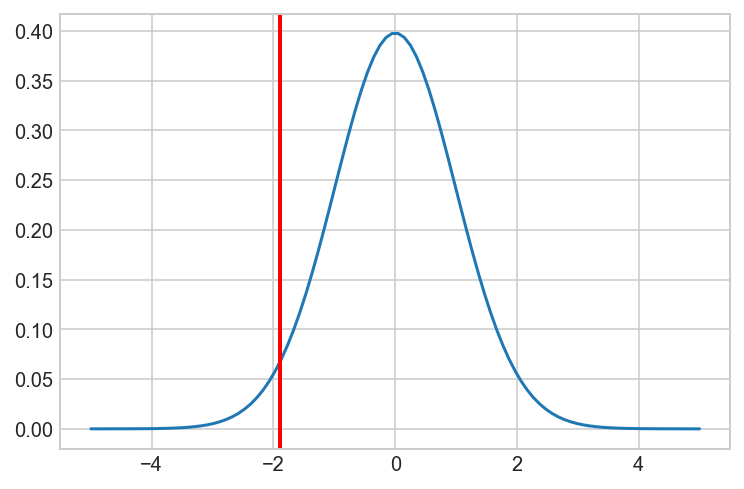

In [53]:
# let's draw the t-distribution
degf = len(experimental)+len(control)-2
x = np.linspace(-5,5,100)
y = stats.t.pdf(x, degf)

plt.plot(x,y) # this is the distribution
plt.axvline(t,c='red', lw=2) #this is out t-statistics

plt.show()

<a id='p-value'></a>

### The P-Value

---

With the t-statistic, we are able to calculate the *statistical significance* of the test with a **p-value**. Statistical significance indicates our degree of confidence to infer a parameter about an overall population based on a statistic calculated from our sample.

Because of the unintuitive framing of Frequentist statistics, the p-value is often communicated and perceived incorrectly. It is important to remember that the p-value does **NOT** relate to _probability of the parameter_. In Frequentist statistics, the parameter, such as the mean difference, is **fixed**. Probability is instead associated with the *data*.

> **The p-value is the probability that, given that the null hypothesis `H0` is true, we could have ended up with a statistic at least as extreme as the one measured from our random sample of data from the true population.**

We have measured a difference in blood pressure of -9.82 between the experimental and control groups. We then calculated a t-statistic associated with this difference of -1.89. In our specific example:

> The p-value is the probability that, given there is a 0.0 true difference in blood pressure between experimental and control conditions (i.e., no effect of the drug), we were able to calculate a t-statistic at least as extreme as -1.89 from a random sample of data from the true population.

<a id='visualize-p-value'></a>

### Visualizing the P-Value

---

Our null hypothesis states that there is no difference between the groups, so the t-statistic would be 0. 

Recall that our alternative hypothesis is that the difference between groups is *not* 0. This could mean that the difference is greater *or* less than 0 — we haven't specified either. This is known as a **two-tailed t-test**, which is what we are currently conducting. The test is "two tailed" because, when we say "at least as extreme as ...," we are thinking about the *magnitude* of our t-statistic.

**We can plot the t-distribution again using our t-statistic of -1.89 as well as a t-statistic of 1.89 on the other side of the distribution.**

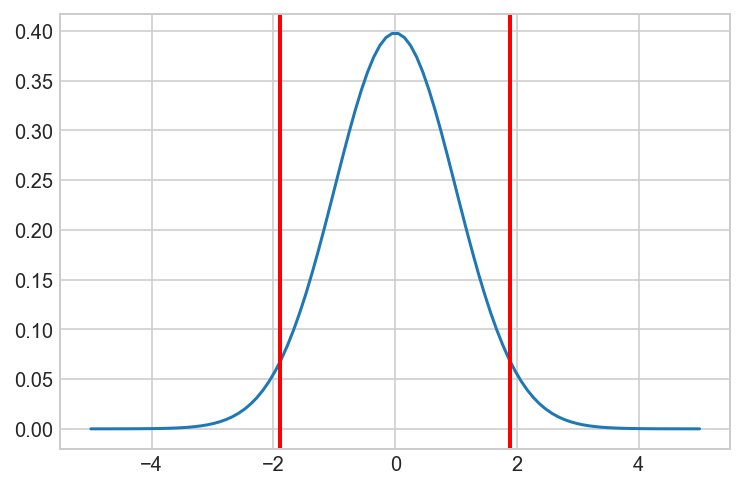

In [54]:
# let's draw the t-distribution
x = np.linspace(-5,5,100)
y = stats.t.pdf(x, degf)

plt.plot(x,y) # this is the distribution
plt.axvline(t,c='red', lw=2) #this is out t-statistics
plt.axvline(-t,c='red', lw=2) #this is out t-statistics

plt.show()

**Our p-value corresponds to the area under the curve of the distribution where the magnitude of the t-statistic is greater than or equal to the one we measured (shown with the dotted lines)**.

`stats.t.cdf()` is the cumulative distribution function and will calculate the area under the curve, up to a specified t-statistic. 

**Calculate the area under the tails of the t-distribution that falls beyond the dotted lines using the `.cdf()` function. This will verify that it's the same as the p-value calculated by `scipy`.**

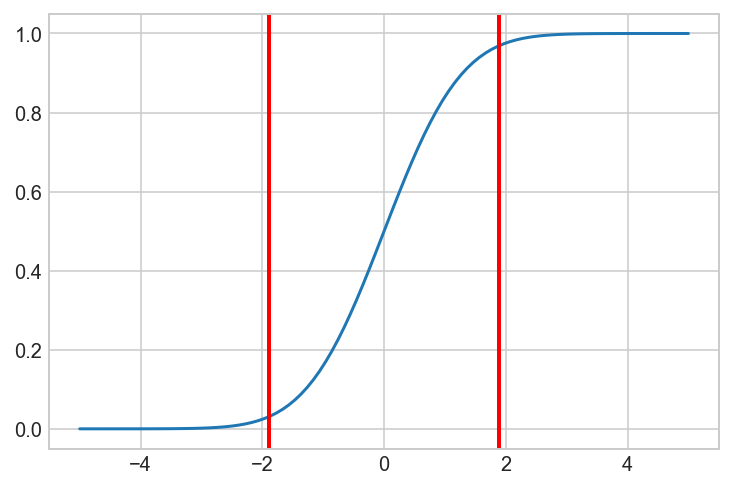

In [83]:
y = stats.t.cdf(x, df=degf)

plt.plot(x,y)
plt.axvline(t,c='red', lw=2)
plt.axvline(-t,c='red', lw=2)

plt.show()

In [58]:
print(stats.t.cdf(t, df=degf))
print('two-tailed p-value: {}'.format(2*stats.t.cdf(t, df=degf)))

0.030752120336265197
two-tailed p-value: 0.0615042406725


<a id='signal-noise'></a>

### An Alternative View: Signal and Noise

---

Another way to think about the t-statistic is in terms of the **signal-to-noise ratio** in our data.

**The signal is our measured difference.** This is our measured mean difference between groups, minus the hypothesized mean **`H0`**.

**The noise is the variation in our data**, or, how much our measurements vary across groups. The t-distribution also imposes an additional penalty for smaller sample sizes by "fattening the tails" of the distribution when the number of observations is small.

Let's explore how variance, or _noise_, affects our ability to detect true differences. Below is a function that will generate blood pressure measurements for groups with a specified mean, standard deviation, and number of samples. The samples will be drawn from a normal distribution whose parameters are mean and standard deviation.

In [59]:
def generate_group(mean, std, n):
    return np.random.normal(mean, std, size=n)

**Generate two groups of 50 observations each. Group one has `mean=100` and `std=5`, group two has `mean=110` and `std=5`.**

In [61]:
grp1 = generate_group(100,5,50)
grp2 = generate_group(110,5,50)

**Plot the distributions of each group on the same plot using histograms.**

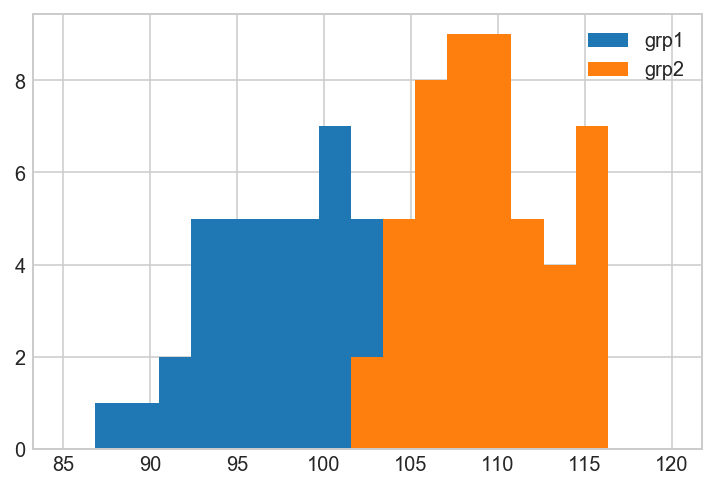

In [76]:
bin = np.linspace(85, 120, 20)

plt.hist(grp1, bin, label='grp1')
plt.hist(grp2, bin, label='grp2')
plt.legend(loc='upper right')
plt.show()

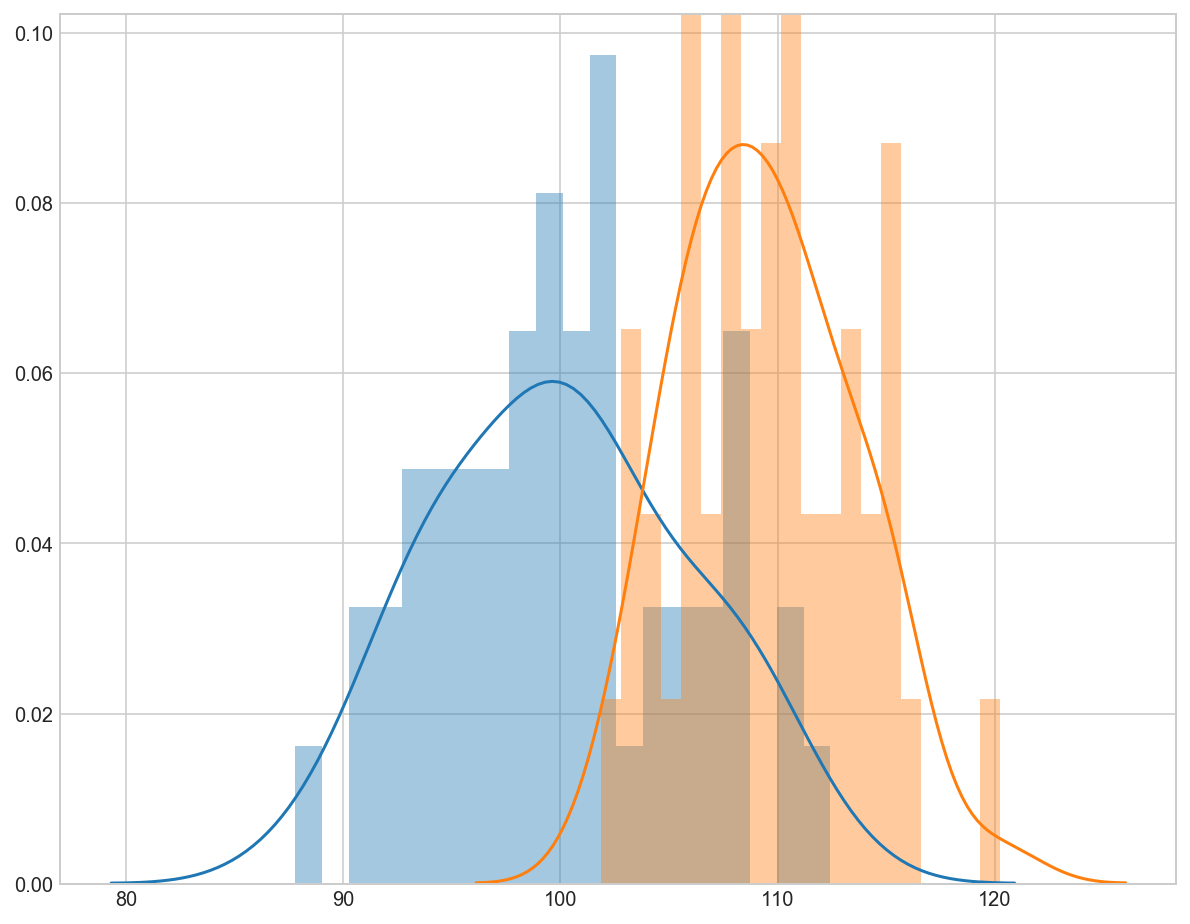

In [91]:
fig = plt.figure(figsize=(10,8))

ax = fig.gca()

ax = sns.distplot(grp1, bins=20, ax=ax)
sns.distplot(grp2, bins=20,  ax=ax)

_These are randomly created groups, so expect your output to vary from your classmates'._

**Use `scipy` to calculate the t-statistic and p-value for the groups' difference in means.**

In [77]:
stats.ttest_ind(grp1, grp2) 

Ttest_indResult(statistic=-9.411603541181384, pvalue=2.291864992853919e-15)

**Generate two groups of 100 observations each. This time, group one has `mean=100` and `std=50`, group two has `mean=110` and `std=50`.**

By increasing the standard deviation of the distribution from which the observations are drawn, we are emulating more variable measurements. If measurements are more variable, this implies more *noise*. Precise measurements will have low variability.

In [80]:
grp1b = generate_group(100,50,100)
grp2b = generate_group(110,50,100)

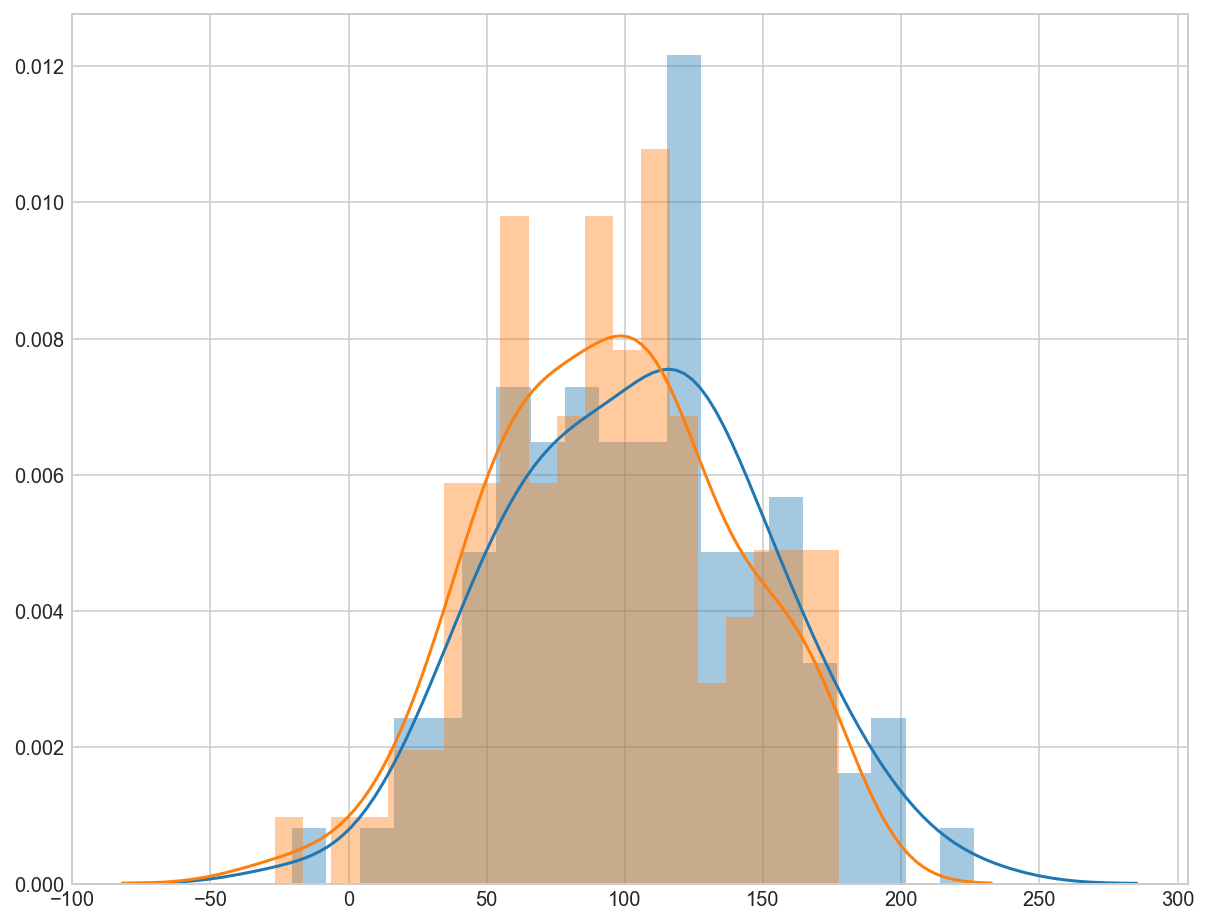

In [92]:
fig = plt.figure(figsize=(10,8))

ax = fig.gca()

ax = sns.distplot(grp1b, bins=20, ax=ax)
sns.distplot(grp2b, bins=20,  ax=ax)

**Plot the groups again and calculate the t-statistic and p-value.**

In [81]:
stats.ttest_ind(grp1b, grp2b) 

Ttest_indResult(statistic=1.5763727743701381, pvalue=0.11653629835311724)

By increasing the amount of noise — or variance — in our observations, we have decreased our ability to infer a difference between the groups, despite their overall populations having the same mean difference.

**In statistical testing of experiments, there are fundamental relationships between sample size, the magnitude of the measured difference (signal), the variability in our measurements (noise), and our degree of confidence in inferences made about the overall population.**

<a id='additional-resources'></a>

### Additional Resources

---

- [A high-level overview of the t-test procedure](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics).
- [Another overview of the t-test procedure](http://www.statsdirect.com/help/parametric_methods/utt.htm).
